In [1]:
#%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FormatStrFormatter
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import texttable
import gc
import timeit
import sys
import os

# Loading reported and synthetic data

In [3]:
# Revoking stored reported data
# https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html

%store -r data_Averoy
%store -r data_Tingvoll
%store -r data_Surnadal
%store -r data_Sunndal
%store -r data_Vestnes
%store -r data_Laerdal

In [4]:
# Revoking top hits frames created by the seen deer estimator
save_dir = "synthetic_data/"
# With option for emigration
top_hits_Averoy_seen_deer = pd.read_pickle(save_dir + "top_hits_Averoy_seen_deer.pkl")
top_hits_Tingvoll_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Tingvoll_seen_deer.pkl"
)
top_hits_Surnadal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Surnadal_seen_deer.pkl"
)
top_hits_Sunndal_seen_deer = pd.read_pickle(save_dir + "top_hits_Sunndal_seen_deer.pkl")
top_hits_Vestnes_seen_deer = pd.read_pickle(save_dir + "top_hits_Vestnes_seen_deer.pkl")
top_hits_Laerdal_seen_deer = pd.read_pickle(save_dir + "top_hits_Laerdal_seen_deer.pkl")

# Without option for emigration
top_hits_Averoy_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Averoy_sd_no_emigration.pkl"
)
top_hits_Tingvoll_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Tingvoll_sd_no_emigration.pkl"
)
top_hits_Surnadal_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Surnadal_sd_no_emigration.pkl"
)
top_hits_Sunndal_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Sunndal_sd_no_emigration.pkl"
)
top_hits_Vestnes_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Vestnes_sd_no_emigration.pkl"
)
top_hits_Laerdal_sd_no_emigration = pd.read_pickle(
    save_dir + "top_hits_Laerdal_sd_no_emigration.pkl"
)

In [5]:
# Data needed for plotting the figures below
compare = "before_hunt"
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]
top_hits_seen_deer = [
    top_hits_Averoy_seen_deer,
    top_hits_Tingvoll_seen_deer,
    top_hits_Surnadal_seen_deer,
    top_hits_Sunndal_seen_deer,
    top_hits_Vestnes_seen_deer,
    top_hits_Laerdal_seen_deer,
]
top_hits_sd_no_emigration = [
    top_hits_Averoy_sd_no_emigration,
    top_hits_Tingvoll_sd_no_emigration,
    top_hits_Surnadal_sd_no_emigration,
    top_hits_Sunndal_sd_no_emigration,
    top_hits_Vestnes_sd_no_emigration,
    top_hits_Laerdal_sd_no_emigration,
]

afont = {"fontname": "Arial"}

# Figure 5

In [6]:
def annual_category_values(top_hits_sd, municipality, number_of_years):
    """
    Calculating the mean for each year over the # top_hits againts
    seen deer per hour. Loading of sorted original dataframe is done
    here in case one runs a high number of replicates and gets into
    memory trouble. Then one can delete the frame here and one avoids
    having all frames open as when they are called from a list.
    """

    # Read original data frames from disk
    save_dir = "synthetic_data/"
    df_municipality = pd.read_pickle(save_dir + municipality)

    # Get all number_of_years records associated with the 9 first parameters in
    # the sorted original frame
    f_calves = []
    y_hinds = []
    a_hinds = []
    m_calves = []
    y_stags = []
    a_stags = []
    for k in range(len(top_hits_sd)):
        parameter = top_hits_sd.iloc[k, 0:9]
        df_hits = df_municipality.loc[
            (df_municipality["init_pop"] == parameter[0])
            & (df_municipality["init_hps"] == parameter[1])
            & (df_municipality["sh_threshold"] == parameter[2])
            & (df_municipality["i_fcalves"] == parameter[3])
            & (df_municipality["i_yhinds"] == parameter[4])
            & (df_municipality["i_ahinds"] == parameter[5])
            & (df_municipality["i_mcalves"] == parameter[6])
            & (df_municipality["i_ystags"] == parameter[7])
            & (df_municipality["i_astags"] == parameter[8])
        ].copy()

        # Extract predicted population category arrays associated with the given top hit
        # and append to list

        f_calves.append(list(df_hits.iloc[0:number_of_years]["f_calves"].values))
        y_hinds.append(list(df_hits.iloc[0:number_of_years]["y_hinds"].values))
        a_hinds.append(list(df_hits.iloc[0:number_of_years]["a_hinds"].values))
        m_calves.append(list(df_hits.iloc[0:number_of_years]["m_calves"].values))
        y_stags.append(list(df_hits.iloc[0:number_of_years]["y_stags"].values))
        a_stags.append(list(df_hits.iloc[0:number_of_years]["a_stags"].values))

    f_calves_mean_year = np.array(f_calves).mean(axis=0)
    f_calves_var_year = np.array(f_calves).var(axis=0)
    y_hinds_mean_year = np.array(y_hinds).mean(axis=0)
    y_hinds_std_year = np.array(y_hinds).std(axis=0)
    a_hinds_mean_year = np.array(a_hinds).mean(axis=0)
    a_hinds_std_year = np.array(a_hinds).std(axis=0)
    m_calves_mean_year = np.array(m_calves).mean(axis=0)
    m_calves_var_year = np.array(m_calves).var(axis=0)
    y_stags_mean_year = np.array(y_stags).mean(axis=0)
    y_stags_std_year = np.array(y_stags).std(axis=0)
    a_stags_mean_year = np.array(a_stags).mean(axis=0)
    a_stags_std_year = np.array(a_stags).std(axis=0)

    return (
        f_calves_mean_year,
        f_calves_var_year,
        y_hinds_mean_year,
        y_hinds_std_year,
        a_hinds_mean_year,
        a_hinds_std_year,
        m_calves_mean_year,
        m_calves_var_year,
        y_stags_mean_year,
        y_stags_std_year,
        a_stags_mean_year,
        a_stags_std_year,
    )

In [7]:
def plot_population_structure_seen_deer(
    municipalities,
    data_municipality,
    top_hits_seen_deer,
    ylabel,
    ax,
):
    """ """
    width = 0.15
    for location in municipalities:
        if location == "Averoy":
            q = 0
        if location == "Tingvoll":
            q = 1
        if location == "Surnadal":
            q = 2
        if location == "Sunndal":
            q = 3
        if location == "Vestnes":
            q = 4
        if location == "Laerdal":
            q = 5

        [
            municipality,
            first_year,
            last_year,
            number_of_years,
            years,
            seen_deer_obs,
            seen_deer_obs_outfield,
            seen_deer_obs_infield,
            hinds_per_stag_obs,
            total_harvest,
            fraction_female_calves_harvested,
            fraction_young_hinds_harvested,
            fraction_adult_hinds_harvested,
            fraction_male_calves_harvested,
            fraction_young_stags_harvested,
            fraction_adult_stags_harvested,
            spring_counts,
        ] = data_municipality[q]

        df_original = [
            "df_original_sorted_Averoy.pkl",
            "df_original_sorted_Tingvoll.pkl",
            "df_original_sorted_Surnadal.pkl",
            "df_original_sorted_Sunndal.pkl",
            "df_original_sorted_Vestnes.pkl",
            "df_original_sorted_Laerdal.pkl",
        ]

        (
            f_calves_mean_year,
            f_calves_var_year,
            y_hinds_mean_year,
            y_hinds_std_year,
            a_hinds_mean_year,
            a_hinds_std_year,
            m_calves_mean_year,
            m_calves_var_year,
            y_stags_mean_year,
            y_stags_std_year,
            a_stags_mean_year,
            a_stags_std_year,
        ) = annual_category_values(
            top_hits_seen_deer[q], df_original[q], number_of_years
        )

        # Lumping male and female calves toghether
        calves_mean_year = f_calves_mean_year + m_calves_mean_year
        calves_std_year = np.sqrt((f_calves_var_year + m_calves_var_year))

        # Making bar plot
        ymin = 0
        ymax = 1300
        year_list = np.arange(number_of_years)
        sem_trans = np.sqrt(len(top_hits_seen_deer[q]))

        ax[q].bar(
            year_list - 2 * width,
            calves_mean_year,
            width,
            color= "firebrick", 
            yerr=calves_std_year,
            align="center",
            alpha=0.5,
            ecolor="black",
            error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
        )
        ax[q].bar(
            year_list - width,
            y_hinds_mean_year,
            width,
            color="royalblue", 
            yerr=y_hinds_std_year,
            align="center",
            alpha=0.5,
            ecolor="black",
            error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
        )
        ax[q].bar(
            year_list,
            a_hinds_mean_year,
            width,
            color="darkorange", 
            yerr=a_hinds_std_year,
            align="center",
            alpha=0.5,
            ecolor="black",
            error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
        )
        ax[q].bar(
            year_list + width,
            y_stags_mean_year,
            width,
            color="darkviolet", 
            yerr=y_stags_std_year,
            align="center",
            alpha=0.5,
            ecolor="black",
            error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
        )
        ax[q].bar(
            year_list + 2 * width,
            a_stags_mean_year,
            width,
            color="c",
            yerr=y_stags_std_year,
            align="center",
            alpha=0.5,
            ecolor="black",
            error_kw=dict(lw=0.6, capsize=1.5, capthick=1),
        )
        if (q == 0) & (ylabel == "yes"):
            ax[q].set_ylim([ymin, ymax])
            ax[q].legend(
                ["calves", "young hinds", "adult hinds", "young stags", "adult stags"],
                loc="upper left",
                fontsize=8,
            )

        if ylabel == "yes":
            ax[q].set_ylabel(
                "# individuals" + " - " + municipality, fontsize=12, **afont
            )

        no_text = [""] * number_of_years
        if q < 5:
            ax[q].set_xticks(year_list)
            ax[q].set_xticklabels(no_text)
        else:
            ax[q].set_xticks(year_list)
            ax[q].set_xticklabels(years, rotation="vertical", fontsize=10)

        ax[q].margins(x=0.01)

        fig.tight_layout()
        fig.subplots_adjust(top=0.94)

## Plotting and saving Fig. 5

CPU times: user 15min 49s, sys: 11min 47s, total: 27min 37s
Wall time: 27min 40s


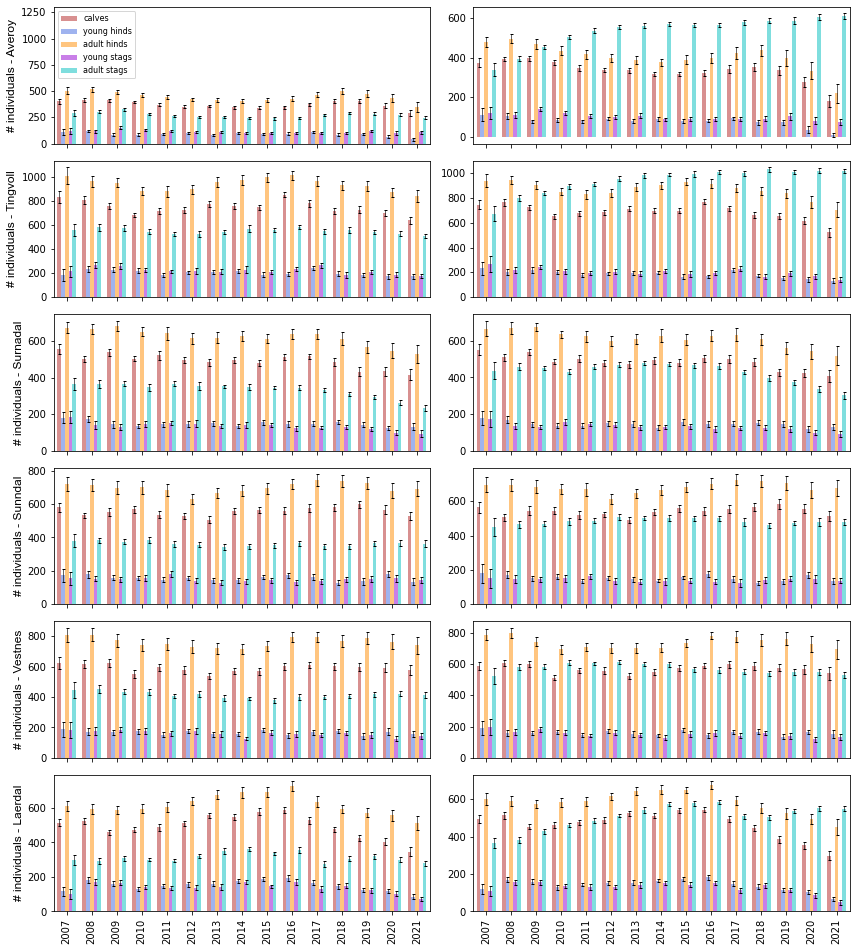

In [8]:
%%time
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]

fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(12, 14))
ax1 = [axs[0, 0], axs[1, 0], axs[2, 0], axs[3, 0], axs[4, 0], axs[5, 0]]
ax2 = [axs[0, 1], axs[1, 1], axs[2, 1], axs[3, 1], axs[4, 1], axs[5, 1]]
ylabel = "yes"
plot_population_structure_seen_deer(
    municipalities,
    data_municipality,
    top_hits_seen_deer,
    ylabel,
    ax1,
)

# top_hits_seen_deer = top_hits_sd_no_emigration
ylabel = "no"
plot_population_structure_seen_deer(
    municipalities,
    data_municipality,
    top_hits_sd_no_emigration,
    ylabel,
    ax2,
)

save_dir = "figures/"
plt.savefig(save_dir + "Figure_5.pdf", dpi=600, bbox_inches="tight")